# this is a file for calculating the Lagrangian rate of change of the log-scale $Chl_a$ using  $\frac{D \ ( log_{e} Chl_a)}{Dt}:=\frac{1}{Chl_a}\frac{D \ ( Chl_a)}{Dt}$
* A few remarks:
  * Unit $mg/(m^3 \cdot day)$
  * Natural logarithm added
  * All the rates on the same time frequency
  * validate the rate of change of the log-scale rate Chl-a by FD
  * Monthly trends 
    * aaa
    * aaa

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xarray as xr
from datetime import datetime
import datetime

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load the floats data, take the lon and lat as list out and calculate the distance

# load CSV output    
# some how the CSV Format has some compatibility issues here
# see readme file for the file convetion in the experiments,
# for instance "3" indicates distance is addd to the dataset 


plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



# freqency
freq = 8
suf = 'D'
in_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_3.csv'
out_filename = 'df_chl_out_'+str(freq)+ suf +'_modisa_4.csv'
folder = './data_collector_modisa_chla9km/'
direc = folder + in_filename
direc

print('in_filename and path:', direc)
print('out_filename:', out_filename)

df_chl_out_3 = pd.read_csv(direc, index_col='index')
df_chl_out_3

in_filename and path: ./data_collector_modisa_chla9km/df_chl_out_8D_modisa_3.csv
out_filename: df_chl_out_8D_modisa_4.csv


,id,time,var_tmp,lon,spd,ve,var_lat,lat,var_lon,temp,vn,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist
index,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,1000.000000,67.351188,11.188906,-6.823625,0.000352,10.873656,0.000996,NaN,6.509875,0.137771,-0.860842,-0.012681,NaN,520.4050
3888,11089,2002-11-01,0.003679,65.099156,13.679406,-11.122000,0.000057,14.269219,0.000106,28.969813,4.337844,0.152450,-0.816873,0.027142,-1.566358,822.7430
3908,34710,2002-11-01,0.001698,63.145031,12.432687,0.757312,0.000064,17.038563,0.000123,28.970219,11.684344,0.383868,-0.415819,0.059694,-1.224066,584.0640
4145,10206,2002-11-09,1000.000000,67.108219,3.428062,-0.786375,0.000984,11.155719,0.003551,NaN,1.562844,0.132682,-0.877188,-0.005089,NaN,545.1970
4147,11089,2002-11-09,0.003868,64.193281,19.677781,-17.539250,0.000065,14.220969,0.000126,28.742188,-6.951906,0.201879,-0.694909,0.049429,-1.306018,858.3870
4149,15707,2002-11-09,1000.000000,67.022625,23.783812,-12.393500,0.000075,12.926656,0.000150,NaN,-15.661781,0.153961,-0.812589,-0.005174,NaN,580.7750
4167,34710,2002-11-09,0.001878,63.000156,26.598219,-2.723375,0.000065,17.952812,0.000126,28.255188,25.294281,0.442761,-0.353831,0.058893,-1.229935,513.0270
4173,34721,2002-11-09,0.001813,68.182750,18.274406,8.236687,0.000063,12.879281,0.000124,29.291313,12.886094,0.151290,-0.820190,0.003190,-2.496244,457.1560
4426,34710,2002-11-17,0.001815,62.227781,51.033437,-25.647250,0.000075,20.239094,0.000152,27.549469,42.687531,0.466490,-0.331158,0.023729,-1.624715,327.3360


In [3]:
# All the rates on the same time frequency
check1 = df_chl_out_3.chl_rate/ df_chl_out_3.chlor_a 
check1 = check1/ freq
check2 = df_chl_out_3.chl_rate.divide(freq *df_chl_out_3.chlor_a, axis = 'index')
# an check 
np.sum(abs(check1 - check2))

0.0

In [4]:
# add the column to the dataframe and output the dataset
df_chl_out_3['chlor_a_logE_rate'] = pd.Series(np.array(check2), index=df_chl_out_3.index)
df_chl_out_3.head()

,id,time,var_tmp,lon,spd,ve,var_lat,lat,var_lon,temp,vn,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,1000.000000,67.351188,11.188906,-6.823625,0.000352,10.873656,0.000996,NaN,6.509875,0.137771,-0.860842,-0.012681,NaN,520.405,-0.011506
3888,11089,2002-11-01,0.003679,65.099156,13.679406,-11.122000,0.000057,14.269219,0.000106,28.969813,4.337844,0.152450,-0.816873,0.027142,-1.566358,822.743,0.022255
3908,34710,2002-11-01,0.001698,63.145031,12.432687,0.757312,0.000064,17.038563,0.000123,28.970219,11.684344,0.383868,-0.415819,0.059694,-1.224066,584.064,0.019439
4145,10206,2002-11-09,1000.000000,67.108219,3.428062,-0.786375,0.000984,11.155719,0.003551,NaN,1.562844,0.132682,-0.877188,-0.005089,NaN,545.197,-0.004794
4147,11089,2002-11-09,0.003868,64.193281,19.677781,-17.539250,0.000065,14.220969,0.000126,28.742188,-6.951906,0.201879,-0.694909,0.049429,-1.306018,858.387,0.030606


In [5]:
df_chl_out_3.chlor_a_logE_rate.describe()  # more scattered on the left hand side

count    692.000000
mean      -0.024882
std        0.146499
min       -1.782442
25%       -0.028650
50%       -0.002615
75%        0.022206
max        0.116349
Name: chlor_a_logE_rate, dtype: float64

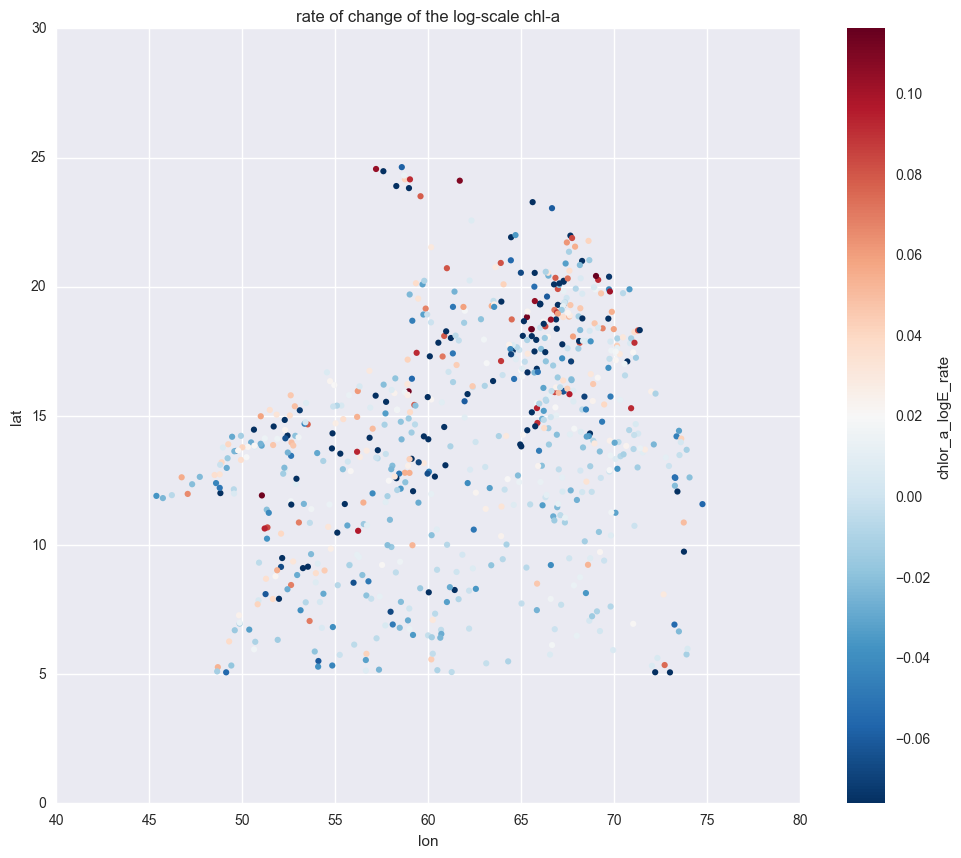

In [6]:
# visualize the ROC of log(chl_a) around the arabian sea region
fig, ax  = plt.subplots(figsize=(12,10))
df_chl_out_3.plot(kind='scatter', x='lon', y='lat', c='chlor_a_logE_rate', cmap='RdBu_r', vmin=check2.median()-0.5*check2.std(), vmax=check2.max(), edgecolor='none', ax=ax, title = 'rate of change of the log-scale chl-a')

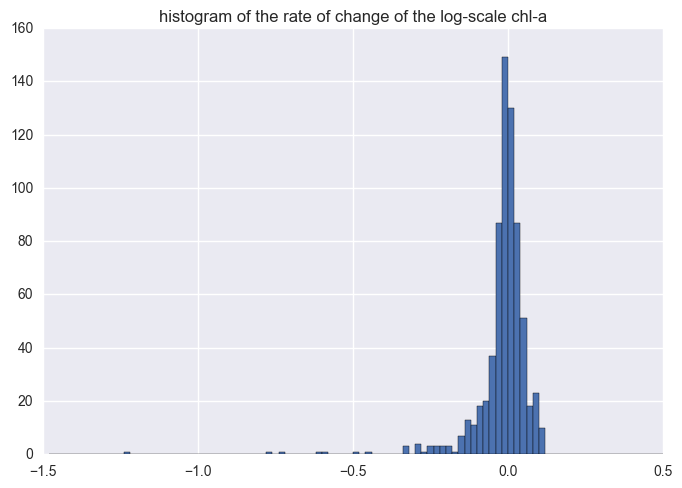

In [7]:
# histogram for non standarized data
axdf_chl = df_chl_out_3.chlor_a_logE_rate.dropna().hist(bins=100,range=[-1.5,0.5]) # there are very a few small values on the left
axdf_chl.set_title('histogram of the rate of change of the log-scale chl-a')

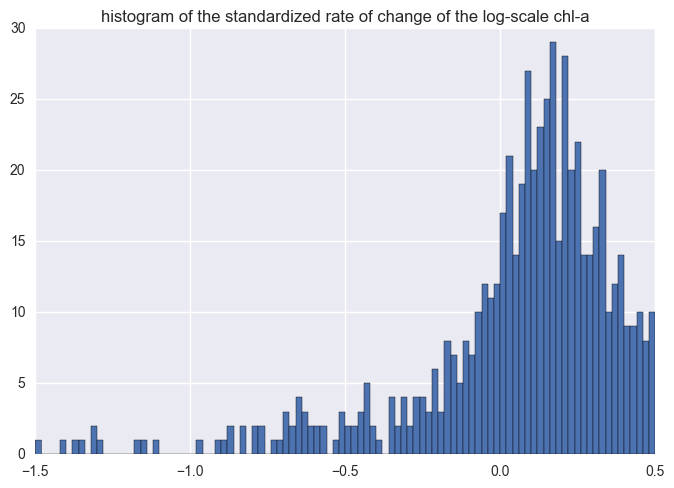

In [8]:
# standarized series
tmp = df_chl_out_3.chlor_a_logE_rate.dropna()
tmp = (tmp - tmp.mean())/tmp.std()
axdf_chl_stdan = tmp.hist(bins=100,range=[-1.5,0.5])   # there are very a few small values on the left
axdf_chl_stdan.set_title('histogram of the standardized rate of change of the log-scale chl-a')

In [20]:
(np.log(0.187383)-np.log(0.156649))   / freq

0.022393377115180996

In [10]:
###########################
# On 2D-subsampling Dataset
###########################
# Val 1:
# id:10206, time:2002-12-27"
# (0.187383 - 0.156649) / (freq*0.187383)    == 0.020502126660369394
#########
# Val 2:
# id:10206, time:2002-12-27"
# (np.log(0.187383)-np.log(0.156649))   / freq == 0.022393377115180996 # very close to the value above

df_chl_out_3.sort_values(by=['id', 'time']).head()

,id,time,var_tmp,lon,spd,ve,var_lat,lat,var_lon,temp,vn,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,1000.000000,67.351188,11.188906,-6.823625,0.000352,10.873656,0.000996,NaN,6.509875,0.137771,-0.860842,-0.012681,NaN,520.405,-0.011506
4145,10206,2002-11-09,1000.000000,67.108219,3.428062,-0.786375,0.000984,11.155719,0.003551,NaN,1.562844,0.132682,-0.877188,-0.005089,NaN,545.197,-0.004794
5440,10206,2002-12-19,1000.000000,64.896875,9.617437,-8.368125,0.001140,12.434812,0.004192,NaN,4.556469,0.156649,-0.805072,0.017498,-1.757012,795.611,0.013963
5699,10206,2002-12-27,1000.000000,64.271031,12.251438,-11.493313,0.000417,12.549094,0.001212,NaN,-1.765500,0.187383,-0.727269,0.030735,-1.512374,866.410,0.020502
3888,11089,2002-11-01,0.003679,65.099156,13.679406,-11.122000,0.000057,14.269219,0.000106,28.969813,4.337844,0.152450,-0.816873,0.027142,-1.566358,822.743,0.022255


In [11]:
# convert into datetime
df_chl_out_3['time'] = pd.to_datetime(df_chl_out_3['time']) # ,format='%m/%d/%y %I:%M%p'
df_chl_out_3.sort_values(by=['id', 'time']).head()  # a check

,id,time,var_tmp,lon,spd,ve,var_lat,lat,var_lon,temp,vn,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,1000.000000,67.351188,11.188906,-6.823625,0.000352,10.873656,0.000996,NaN,6.509875,0.137771,-0.860842,-0.012681,NaN,520.405,-0.011506
4145,10206,2002-11-09,1000.000000,67.108219,3.428062,-0.786375,0.000984,11.155719,0.003551,NaN,1.562844,0.132682,-0.877188,-0.005089,NaN,545.197,-0.004794
5440,10206,2002-12-19,1000.000000,64.896875,9.617437,-8.368125,0.001140,12.434812,0.004192,NaN,4.556469,0.156649,-0.805072,0.017498,-1.757012,795.611,0.013963
5699,10206,2002-12-27,1000.000000,64.271031,12.251438,-11.493313,0.000417,12.549094,0.001212,NaN,-1.765500,0.187383,-0.727269,0.030735,-1.512374,866.410,0.020502
3888,11089,2002-11-01,0.003679,65.099156,13.679406,-11.122000,0.000057,14.269219,0.000106,28.969813,4.337844,0.152450,-0.816873,0.027142,-1.566358,822.743,0.022255


In [12]:
# CSV CSV CSV CSV with specfic index
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist}
# df_chl_out_3.csv --  {lat, lon, temp, chl_rate, dist, chlor_a_log10_rate}

# 3 represents 3 features: {temp, chl_rate, dist}
# 4 represents 4 features: {temp, chl_rate, dist, chlor_a_log10_rate }
print('out_filename:', out_filename)
df_chl_out_3.to_csv(out_filename, sep=',', index_label = 'index')

# load CSV output
test = pd.read_csv(out_filename, index_col='index')

# a check
test.sort_values(by=['id', 'time']).head()

out_filename: df_chl_out_8D_modisa_4.csv


,id,time,var_tmp,lon,spd,ve,var_lat,lat,var_lon,temp,vn,chlor_a,chlor_a_log10,chl_rate,chl_rate_log10,dist,chlor_a_logE_rate
index,,,,,,,,,,,,,,,,,
3886,10206,2002-11-01,1000.000000,67.351188,11.188906,-6.823625,0.000352,10.873656,0.000996,NaN,6.509875,0.137771,-0.860842,-0.012681,NaN,520.405,-0.011506
4145,10206,2002-11-09,1000.000000,67.108219,3.428062,-0.786375,0.000984,11.155719,0.003551,NaN,1.562844,0.132682,-0.877188,-0.005089,NaN,545.197,-0.004794
5440,10206,2002-12-19,1000.000000,64.896875,9.617437,-8.368125,0.001140,12.434812,0.004192,NaN,4.556469,0.156649,-0.805072,0.017498,-1.757012,795.611,0.013963
5699,10206,2002-12-27,1000.000000,64.271031,12.251438,-11.493313,0.000417,12.549094,0.001212,NaN,-1.765500,0.187383,-0.727269,0.030735,-1.512374,866.410,0.020502
3888,11089,2002-11-01,0.003679,65.099156,13.679406,-11.122000,0.000057,14.269219,0.000106,28.969813,4.337844,0.152450,-0.816873,0.027142,-1.566358,822.743,0.022255


In [13]:
## check the week numbers of the range from Nov-01-01 to Mar-01-01
for year in range(2002, 2017):
    print(str(year)+'-11-01 is week', datetime.datetime(year, 11, 1).isocalendar()[1])  # 44, 45, 

print('----')
for year in range(2002, 2017):
    print(str(year)+'-3-31 is week', datetime.datetime(year, 3, 31).isocalendar()[1])  # 13, 14

plt.show()

2002-11-01 is week 44
2003-11-01 is week 44
2004-11-01 is week 45
2005-11-01 is week 44
2006-11-01 is week 44
2007-11-01 is week 44
2008-11-01 is week 44
2009-11-01 is week 44
2010-11-01 is week 44
2011-11-01 is week 44
2012-11-01 is week 44
2013-11-01 is week 44
2014-11-01 is week 44
2015-11-01 is week 44
2016-11-01 is week 44
----
2002-3-31 is week 13
2003-3-31 is week 14
2004-3-31 is week 14
2005-3-31 is week 13
2006-3-31 is week 13
2007-3-31 is week 13
2008-3-31 is week 14
2009-3-31 is week 14
2010-3-31 is week 13
2011-3-31 is week 13
2012-3-31 is week 13
2013-3-31 is week 13
2014-3-31 is week 14
2015-3-31 is week 14
2016-3-31 is week 13


the min and max of the week index is 1, 53 :


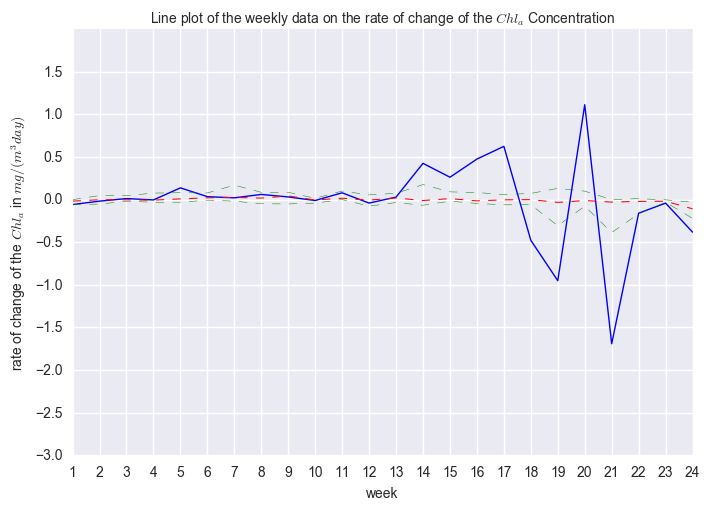

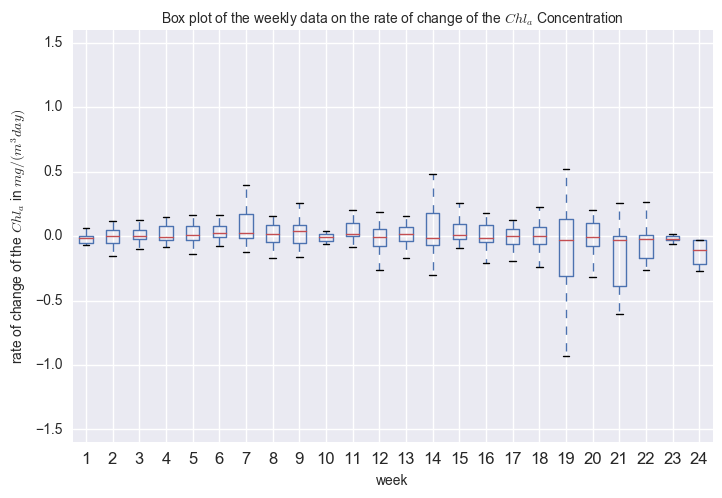

In [14]:
##### weekly plot on the Lagrangian rate of change of the chl-a
#sns.set(style="white")
#sns.set(color_codes=True)

### 
# Approach 1 depreciated
#grouped = df_timed.chl_rate.groupby(df_timed.index.week)
#grouped.plot.box()

### 
# Approach 2
# prepare data  a. use index or columns to group

###
# select the corresponding weeks, prepare the data
df_timed = df_chl_out_3.set_index('time')
df_timed['week'] = df_timed.index.week

mask_NovMar = (df_timed.week<=14) | (df_timed.week >=44)
df_timed_NovMar = df_timed[mask_NovMar]
#df_timed_NovMar.head()

# now rotate the index to make Nov-01-01 the first month
print('the min and max of the week index is %d, %d :' % (df_timed_NovMar.week.min(), df_timed_NovMar.week.max()) )
# make the 44th week the 1st week
df_timed_NovMar['week_rotate'] = (df_timed_NovMar.week + 10 ) % 53
df_timed_NovMar.week_rotate.describe() # now from 1 to 24


axes1=df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chl_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-3,2)
axes1.set_title("Line plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-3, 2, 0.5))
plt.xticks(np.arange(1, 25, 1))
plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chl_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1.6,1.6)
axes2.set_title("Box plot of the weekly data on the rate of change of the $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.show()

# the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")

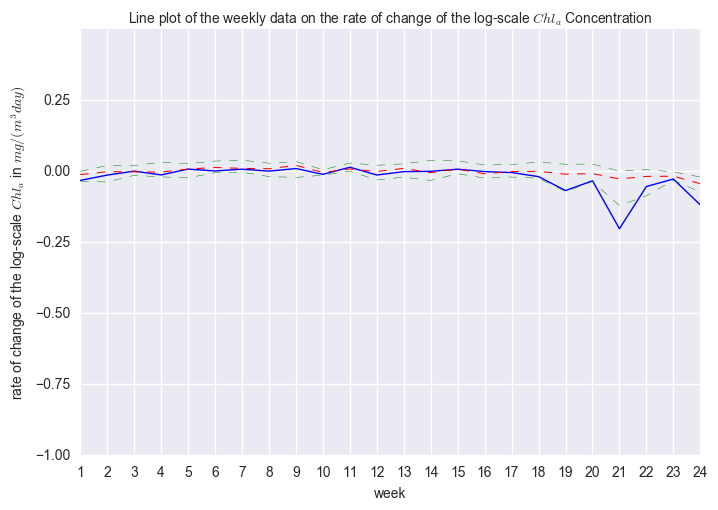

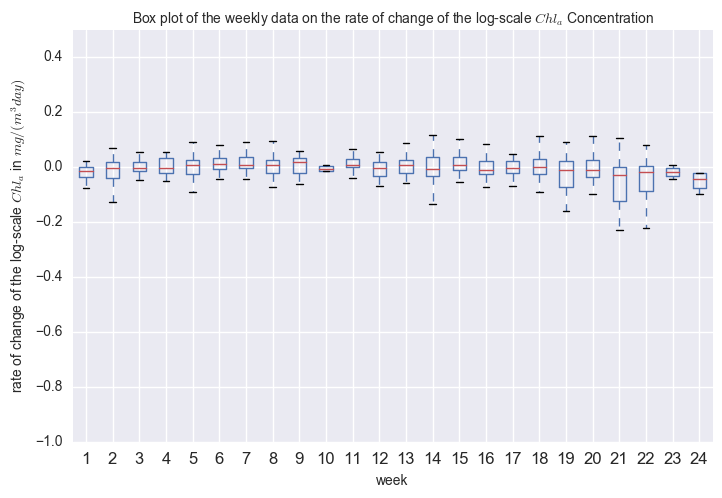

In [15]:
# weekly plot on the Lagrangian rate of change of the log-scale chl-a
# This is the rate of change on the exponential scale
axes1=df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].mean().plot(linestyle="-",color='b', linewidth=1)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
df_timed_NovMar.groupby(['week_rotate'])['chlor_a_logE_rate'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
axes1.set_ylim(-1,0.5)
axes1.set_title("Line plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
plt.yticks(np.arange(-1, 0.5, 0.25))
plt.xticks(np.arange(1, 25, 1))
#plt.show()


# http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
axes2 = df_timed_NovMar.boxplot(column='chlor_a_logE_rate', by='week_rotate')
plt.suptitle("") # equivalent
axes2.set_ylim(-1,0.5)
axes2.set_title("Box plot of the weekly data on the rate of change of the log-scale $Chl_a$ Concentration",  fontsize=10)
plt.xlabel('week', fontsize=10)
plt.ylabel('rate of change of the log-scale $Chl_a$ in $mg/(m^3 day)$', fontsize=10)
#plt.show()


#plt.close('all')

In [16]:
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()



 summary of the Chl_rate 
 count    109.000000
mean      -0.008042
std        0.160383
min       -0.617286
25%       -0.043352
50%       -0.003292
75%        0.029215
max        0.941259
Name: chl_rate, dtype: float64


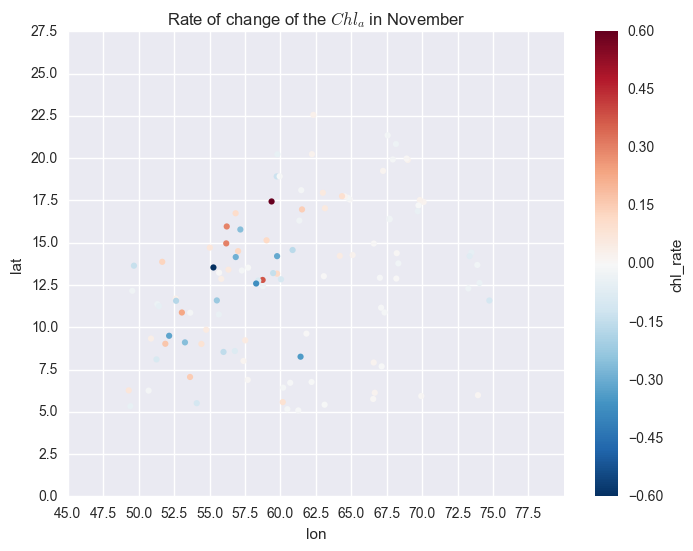



 summary of the Chl_rate 
 count    103.000000
mean       0.057808
std        0.318363
min       -0.832372
25%       -0.044591
50%        0.022036
75%        0.087131
max        2.120178
Name: chl_rate, dtype: float64


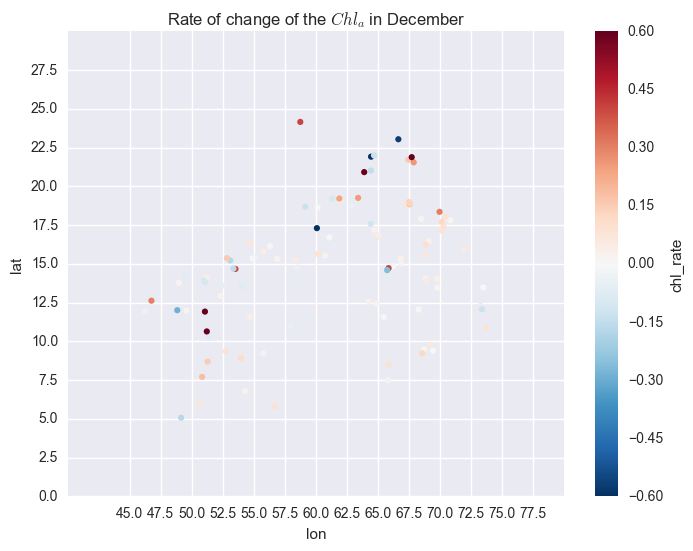



 summary of the Chl_rate 
 count    157.000000
mean       0.182644
std        1.107132
min       -0.925911
25%       -0.040639
50%        0.011206
75%        0.100275
max       12.120585
Name: chl_rate, dtype: float64


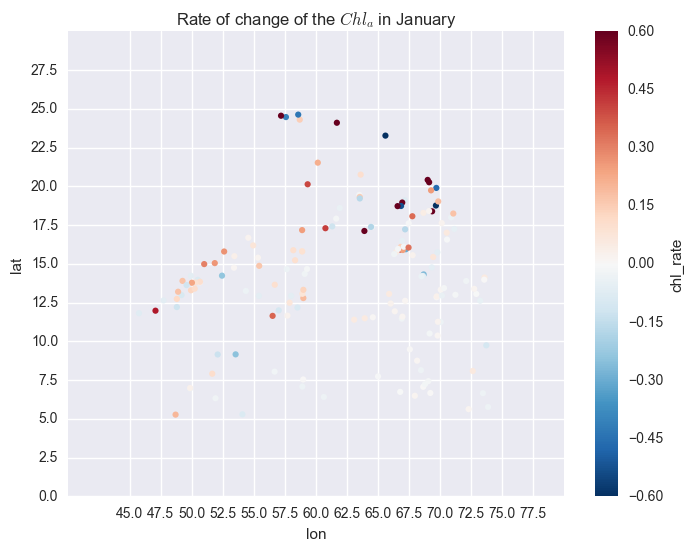



 summary of the Chl_rate 
 count    157.000000
mean      -0.064656
std        4.148605
min      -30.828177
25%       -0.093045
50%       -0.004723
75%        0.075044
max       27.363718
Name: chl_rate, dtype: float64


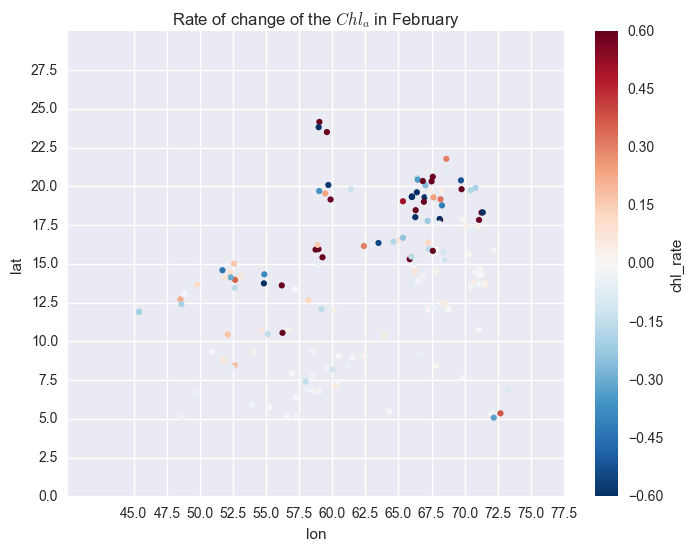



 summary of the Chl_rate 
 count    166.000000
mean      -0.209397
std        2.927867
min      -14.264926
25%       -0.146459
50%       -0.022587
75%        0.002438
max       14.138201
Name: chl_rate, dtype: float64


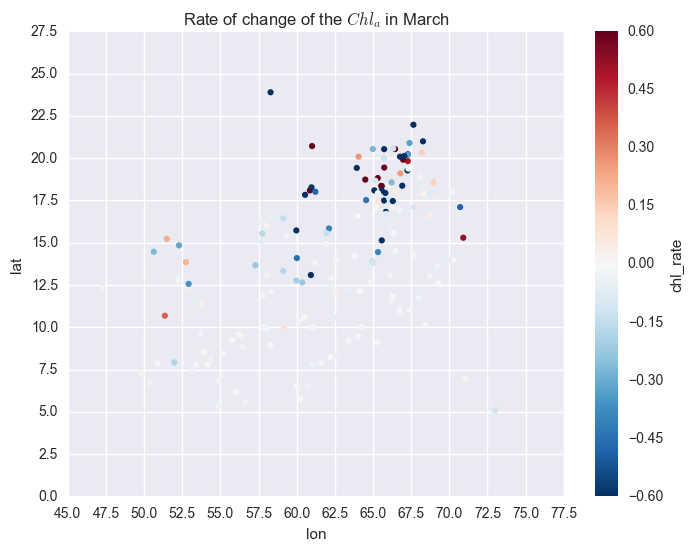

In [17]:
# spatial plot for different months --  totally five months 1, 2, 3, 11, 12, 
for i in range(0,5,1):
    month_ind = np.array([11,12,1,2,3])
    month_names = ['November', 'December','January','February', 'March']
    aa = df_timed_NovMar[df_timed_NovMar.index.month == month_ind[i]]
    fig, ax  = plt.subplots(figsize=(8,6))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(), edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate.describe())
    aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r', vmin=-0.6, vmax=0.6, edgecolor='none', ax=ax, title = 'Rate of change of the $Chl_a$ in %s' % (month_names[i]))
    plt.xticks(np.arange(45, 80, 2.5))
    plt.yticks(np.arange(0, 28, 2.5))
    plt.show()

In [18]:
print("test")

test
